In [ ]:
from traitlets.config.manager import BaseJSONConfigManager
import jupyter_core
# path = "/Users/i.oseledets/anaconda2/envs/teaching/etc/jupyter/nbconfig"
cm = BaseJSONConfigManager(config_dir=path)
cm.update("livereveal", {
              "theme": "sky",
              "transition": "zoom",
              "start_slideshow_at": "selected",
               "scroll": True
})


# Лекция 2. Матрицы и операции с ними. Матричные нормы. Ранг матрицы, малоранговая аппроксимация, SVD. 

## План на сегодня

- Матрицы и их свойства
- Операции между векторами и матрицами
- Ранг матрицы и его свойства
- Сингулярное разложение (SVD)
- Некоторые приложения сингулярного разложения

## Матрицы

- Матрица может быть рассмотрена как последовательность векторов одной размерности, которые являются её столбцами:

$$
   A = [a_1, \ldots, a_m],
$$

где $a_m \in \mathbb{R}^{n\times 1}$. Тогда $A \in \mathbb{R}^{n \times m}$.  

- Альтернативная форма записи 

$$ A = \begin{bmatrix} a_{11} & \ldots & a_{1,m} \\ \vdots & \cdots & \vdots \\ a_{n1} & \ldots & a_{nm} \end{bmatrix} $$

То есть матрица - это двумерный массив, в котором $n$ строк и $m$ столбцов

- Каждый элемент матрицы имеет два индекса - номер строки и номер столбца, поэтому иногда матрицу сокращённо обозначают $A = [a_{ij}] \in \mathbb{R}^{n \times m}$

## Операции с матрицами и векторами

- Матрицы одной размерности можно складывать. Сложение выполняется покомпонентно по аналогии с векторами

$$ C = A + B \Leftrightarrow c_{ij} = a_{ij} + b_{ij} $$

- Матрицу можно умножать на скаляр также покомпонентно по аналогии с векторами. 

- Матрицу можно умножить на вектор, но только если размерность вектора совпадает с числом столбцов матрицы! Резльтатов операции является вектор, размерность которого равна числу строк матрицы

$$ y = Ax \Leftrightarrow y_i = \sum_{j=1}^m a_{ij}x_j. $$

То есть каждый элемент результата есть скалярное произведение каждой строки матрицы с данным вектором

- Умножение матрицы на вектор эквивалентно вычислению линейной комбинации столбцов матрицы

$$
   y =  Ax \quad \Longleftrightarrow \quad y = a_1 x_1 + a_2 x_2 + \ldots +a_m x_m.
$$

- В NumPy операция умножения матрицы на вектор обозначена ```@```

In [1]:
import numpy as np
n = 10
m = 100
A = np.random.randn(n, m)
x = np.random.rand(m)
y = A @ x
print(y)

[ 3.49572374 -1.11345515 -4.15682695 -7.81662801 -7.74007537 -8.35945567
 -9.96595569  4.97169511 -4.33262702  4.58439137]


- Помимо умножения на вектор, данную матрицу $A$ можно умножить на другую матрицу $B$ с числом строк равному числу столбцов матрицы $A$

$$ C = AB \Leftrightarrow c_{ij} = \sum_{k=1}^m a_{ik}b_{kj}$$

- Мнемоническое правило перемножения матриц звучит как "строка на столбец"
- Умножать матрицу $A$ на матрицу $B$ значит получить матрицу $C$ со столбцами равными произведению матрицы $A$ на векторы, которые образуют столбцы матрицы $B$ 

In [2]:
import numpy as np
n = 10
m = 100
k = 5
A = np.random.randn(n, m)
B = np.random.rand(m, k)
C = A @ B
print(C.shape)
print(C)

(10, 5)
[[ -3.03292945  -2.69011305  -3.89821908  -9.81415727 -11.3399928 ]
 [ -2.07234375   0.32910927  -0.59531428  -0.9599807    1.34981885]
 [  8.91809604   8.55192359   1.0107066    7.80138482   5.42144325]
 [  1.63674811   0.3911144   -0.75161138   1.99544744   6.56566197]
 [  4.10663123  -0.26895265   0.1116446    3.43353011   0.86639947]
 [ -8.12620054   2.26669278  -3.13605184   3.32730998  -1.33527143]
 [ -3.07906988  -4.68811619 -11.65445566 -11.80666233  -9.29776258]
 [  2.64246716  -0.4433471   -5.11738535   2.31508407  -2.03357239]
 [ 11.76973721   9.97585074   1.91957807   4.58396334   4.75451448]
 [ -0.34473884  -3.94829542  -6.23895223  -3.13079468  -9.8384313 ]]


## Свойства и функции от матриц

- Следом квадратной матрицы называется сумма диагональных элементов

$$ tr(A) = \sum_{i=1}^n a_{ii} $$

- Матрица $A^{\top}$ называется транспонированной матрицей для матрицы $A$, если её столбцы есть строки матрицы $A$, например

$$ \begin{bmatrix} 1 & 2 & -1 \\ 0 & 5 & 1  \end{bmatrix}^{\top} = \begin{bmatrix} 1 & 0 \\ 2 & 5 \\ -1 & 5  \end{bmatrix} $$

- Скалярное произведение векторов $x$ и $y$ можно записать как $x^{\top}y$
- Свойство транспонирования $(AB)^{\top} = B^{\top}A^{\top}$

- Скалярное произведение для матриц определяется следующим образом 
$$
    (A, B)_F = \displaystyle{\sum_{i=1}^{n}\sum_{j=1}^{m}} a_{ij} b_{ij} \equiv \mathrm{trace}(A^{\top} B),
$$

## Важные примеры матриц

- Нулевая $0$ - состоит из всех 0
- Единичная $I$ - квадратная матрица с 1 на диагонали и нулями вне
- Матрица перестановки $P$ - в каждом столбце и строке только одна 1, остальные 0. Умножение вектора на такую матрицу приводит к перестановке его элементов
- Матрица $A$ называется симметричной, если $A = A^{\top}$
- Ортогональные (или унитарные в комплексном случае) матрицы такие что $U^{\top}U = I$ - означает, что норма каждого столбца равна 1 и они попарно ортогональны

### Свойства ортогональных матриц

- Произведение двух унитарных матриц – унитарная матрица:  

$$(UV)^{\top} UV = V^\top (U^\top U) V = V^\top V = I$$

- Умножение вектора на универную матрицу не меняет его евклидову норму: $\|Ux\|^2_2 = x^{\top}U^{\top}Ux = \|x\|_2$

- Вычисления с использованием ортогональных матриц не приводят к потере точности!

### Примеры ортогональных матриц

- Матрица Хаусхолдера (отражение)

$$H \equiv H(v) = I - 2 vv^*,$$

где $v$ – $n \times 1$ вектор и $v^* v = 1$. Это матрица отражения относительно плоскости с нормалью $v$:

$$ Hx = x - 2(v^* x) v$$

<img src="./householder.jpeg">  

- Матрица Гивенса (поворот)

$$
    G = \begin{bmatrix}
          \cos \alpha & -\sin \alpha \\
          \sin \alpha & \cos \alpha
        \end{bmatrix},
$$

что является поворотом на угол $\alpha$ на плоскости. В общем случае, выберем две плоскости $(i, j)$ и повернём вектор $x$  

$$
x' = G x,
$$

только в $i$-ой и $j$-ой координатах:

$$
    x'_i =  x_i\cos \alpha - x_j\sin \alpha , \quad x'_j = x_i \sin \alpha  +  x_j\cos\alpha,
$$

и оставим остальные координаты $x_i$ неизменными.


## Примеры использования матриц

- Систему линейных уравнений с $m$ уравнениями и $n$ неизвестными можно записать, как $Ax = b$, где $A$ – это матрица $m \times n$
- Параметры линейных слоёв в нейронных сетях - это матрицы
- Набор данных (dataset) для обучение модели машинного обучения обычно представляется в виде матрицы с размерностью число объектов на число признаков, которые описывают каждый объект  

## Матричные нормы

- Если считать матрицу вектором, элементы которого переставлены в другом порядке, то мы по аналогии с евклидовой нормой вектора получим **фробениусову норму** матрицы:

$$
  \Vert A \Vert_F \stackrel{\mathrm{def}}{=} \Big(\sum_{i=1}^n \sum_{j=1}^m |a_{ij}|^2\Big)^{1/2}
$$

Упражнение: покажите, что $\|A\|_F = \sqrt{(A, A)_F}$.

## Матричные нормы

$\Vert \cdot \Vert$ называется матричной нормой, если это векторная норма на векторном пространстве матриц размера $n \times m$:
1. $\|A\| \geq 0$ и если $\|A\| = 0$ то $A = O$
3. $\|\alpha A\| = |\alpha| \|A\|$
4. $\|A+B\| \leq \|A\| + \|B\|$ (неравенство треугольника)

Дополнительно некоторые нормы обладают свойством субмультипликативности

* <font color='red'> $\Vert A B \Vert \leq \Vert A \Vert \Vert B \Vert$ </font>

Эти нормы также называются **субмультипликативными нормами**.

Это свойство необходимо во многих случаях, например для оценки ошибки решения линейной системы (позднее обсудим эту тему). 

Примером не субмультипликативной нормы является чебышёвская норма

$$
\|A\|_C = \displaystyle{\max_{i,j}}\, |a_{ij}|
$$

## Операторные нормы

Наиболее важным классом матричных норм являются **операторные нормы**, которые определяются следующим образом

$$
    \Vert A \Vert_{*,**} = \sup_{x \ne 0} \frac{\Vert A x \Vert_*}{\Vert x \Vert_{**}},
$$

где $\Vert \cdot \Vert_*$ и $\| \cdot \|_{**}$ **векторные нормы**.

Можно показать, что операторные нормы являются субмультипликативными.

## Матричные $p$-нормы

Важный класс операторных норм – матричные $p$-нормы, которые определены для $\|\cdot\|_* = \|\cdot\|_{**} = \|\cdot\|_p$. <br>

Среди всех $p$-норм три нормы наиболее часто используются:  

- $p = 1, \quad \Vert A \Vert_{1} = \displaystyle{\max_j \sum_{i=1}^n} |a_{ij}|$.

- $p = 2, \quad$ спектральная норма, обозначается как $\Vert A \Vert_2$.

- $p = \infty, \quad \Vert A \Vert_{\infty} = \displaystyle{\max_i \sum_{j=1}^m} |a_{ij}|$.

Покажем справедливость выражения для $p=\infty$.

## Спектральная норма

- Спектральная норма, $\Vert A \Vert_2$, одна из наиболее часто используемых, наряду с нормой Фробениуса
- Она не может быть вычислена напрямую через элементы матрицы, но для её вычисления существуют эффективные алгоритмы
- Она напрямую связана с сингулярным разложением матрицы (SVD) поскольку выполнено следующее равенство

$$
   \Vert A \Vert_2 = \sigma_1(A)
$$

где $\sigma_1(A)$ – максимальное сингулярное число матрицы $A$. 

- Подробнее про SVD будет рассказано далее, а сейчас давайте вычислим все вышеупомянутые нормы

In [6]:
import numpy as np
n = 100
m = 2000
a = np.random.randn(n, m) # Random n x n matrix
s1 = np.linalg.norm(a, 2) # Spectral
s2 = np.linalg.norm(a, 'fro') # Frobenius
s3 = np.linalg.norm(a, 1) # 1-norm
s4 = np.linalg.norm(a, np.inf) 
print('Spectral: {0:} \nFrobenius: {1:} \n1-norm: {2:} \ninfinity: {3:}'.format(s1, s2, s3, s4))

Spectral: 54.41267353957946 
Frobenius: 448.30076755736087 
1-norm: 100.44454197210644 
infinity: 1699.653484075435


## Линейная зависимость

**Определение.** Векторы $a_i$ называются **линейно зависимыми**, если существуют коэффициенты $x_i$ не равные нулю одноврменно такие что

$$\sum_i a_i x_i = 0,$$

или в матричной форме

$$
   Ax = 0, \quad \Vert x \Vert \ne 0.
$$

В этом случае говорят, что у матрицы $A$ нетривиальное **ядро** (kernel или nullspace), которое обознаается $N(A)$ (или $\text{ker}(A)$).

Векторы, которые не являются линейно зависимыми называются **линейно независимыми**.

## Ранг матрицы 

**Определение.** Рангом матрицы $A$ называется максимальное число линейно независимых *столбцов* матрицы $A$.

Вы также можете использовать линейные комбинации *строк* для определения ранга, то есть формально существует два ранга: строчный и столбцовый.

**Теорема**  
Размерность пространства столбцов матрицы совпадает с размерностью пространства её строк.

[Доказательство](https://ocw.mit.edu/courses/mathematics/18-701-algebra-i-fall-2010/study-materials/MIT18_701F10_rrk_crk.pdf)

- Таким образом, ранг матрицы определяется однозначно!

## Матрица полного ранга


Матрица $A \in \mathbb{R}^{m \times n}$ называется матрицей полного ранга, если $\mathrm{rank}(A) = \min(m, n)$.

Пусть имеется матрица из $n$ столбцов.
Пусть эти столбцы сгенерированы из стандартного нормального распределения $\mathcal{N}(0, 1)$.

**Q**: Какова вероятность, что ранг этой матрицы $m < n$?

**A**: Случайная матрица является полноранговой с вероятностью 1.

## Вычисление ранга матрицы
Мы также можем попробовать вычислить ранг матрицы с помощью функции из NumPy: 

```np.linalg.matrix_rank```

In [8]:
#Computing matrix rank
import numpy as np
n = 50 
a = np.ones((n, n))
print('Rank of the matrix:', np.linalg.matrix_rank(a))
b = a + 1e-8 * np.random.randn(n, n)
print('Rank of the matrix:', np.linalg.matrix_rank(b, tol=1e-7))

Rank of the matrix: 1
Rank of the matrix: 10


### <font color='red'> Итак, малое возмущение матрицы может очень сильно повлиять на ранг! </font>

### Неустойчивость вычисления ранга матрицы

Для любой матрицы $A$ ранга $r < \min(m, n)$ существует матрица $B$ такая что её ранг равен $\min(m, n)$ и

$$
 \Vert A - B \Vert = \epsilon.
$$


**Q**: Значит ли это, что численный ранг матрицы не имеет никакого смысла? 

(Малое возмущение приводит к полному рангу!)


**A**: Нет. Нам нужно найти матрицу $B$ такую что $\|A-B\| = \epsilon$ и ранг $B$ минимален. Таким образом, мы можем вычислить ранг матрицы только с заданной точностью $\epsilon$.
Один из подходов к вычислению ранга матрицы – это сингулярное разложение матрицы (SVD).

## Сингулярное разложение

**Теорема.** Любая матрица $A\in \mathbb{C}^{n\times m}$ может быть представлена в виде произведения трёх матриц:  

$$
   A = U \Sigma V^*,
$$

где $U$ – унитарная матрица $n \times K$, $V$ – унитарная матрица $m \times K$, $K = \min(m, n)$, <br> $\Sigma$ – диагональная матрица с неотрицательными элементами на диагонали $\sigma_1 \geq  \ldots, \geq \sigma_K$. <br>
Более того, если $\text{rank}(A) = r$, тогда $\sigma_{r+1} = \dots = \sigma_K = 0$.

## Снижение размерности и малоранговая аппроксимация

- Если матрица $A$ является матрицей неполного ранга, то она представима в виде

$$ A = UV, $$

где $U \in \mathbb{R}^{n \times k}$ и $V \in \mathbb{R}^{k \times m}$

- Можно хранить только $U$ и $V$, то есть всего лишь $(n+m) k$ элементов, что может быть использовано для сжатия. Мы также можем вычислить произведение матрицы $A$ ранга $k$ на вектор $x$ гораздо быстрее:

* Умножение $y = Vx$ стоит $\mathcal{O}(mk)$ операций.
* Умножение $z = Uy$ стоит $\mathcal{O}(nk)$ операций.

Это же применимо для сложения, поэлементного умножения и других операций.
Например, для сложения:

$$
    A_1 + A_2 = U_1 V_1 + U_2 V_2 = [U_1|U_2] [V_1^\top|V_2^\top]^\top
$$

In [1]:
# A fast matrix-by-vector product demo
import numpy as np
n = 10000
r = 10
u = np.random.randn(n, r)
v = np.random.randn(n, r)
a = u.dot(v.T)
x = np.random.randn(n)
%timeit a@x
%timeit u@(v.T@x)

39.2 ms ± 6.77 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
67.5 µs ± 95.4 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Снижение размерности

- Многие данные в реальном мире лежат в пространстве высокой размерности (описываются большим количеством параметров). Например, изображения ($512\times 512$ пикселей), тексты, графы, etc.
- Однако, обрабатывать данные высокой размерности – сложная задача!

**Q**: Возможно ли уменьшить размерность данных, сохранив при этом важные отношения между объектами, например расстояние?

**[Лемма Johnson'a–Lindenstrauss'a](http://cseweb.ucsd.edu/~dasgupta/papers/jl.pdf)** 

Пусть $N\gg 1$. Дано $0 < \epsilon < 1$, $m$ точек из $\mathbb{R}^N$ и $n > \frac{8 \log m}{\epsilon^2}$ (мы хотим, чтобы $n\ll N$).

Тогда существует **линейное** отображение $f: \mathbb{R}^N \rightarrow \mathbb{R}^n$ такое что выполнено следующее неравенство:

$$(1 - \epsilon) \Vert u - v \Vert^2 \leq \Vert f(u) - f(v) \Vert^2 \leq (1 + \epsilon) \Vert u - v \Vert^2.$$


- Эта лемма утверждает, что существует линейное отображение из пространства большой размерности в пространство малой размерности такое что расстояния между точками в этих пространствах практически одинаковы.
- Утверждение не практичное из-за наличия зависимости от $\epsilon$.
- Эта лемма не даёт способа построения $f$, но гарантирует, что такое отображение существует.

## Малоранговая аппроксимация

Важная задача во многих прилоджениях – это найти малоранговое приближение для данной матрицы с точностью $\epsilon$ или рангом $r$. <br>

Примеры:
* метод главных компонент (PCA)
* факторный анализ
* линейная задача наименьших квадратов
* латентный семантический анализ

Эти задачи могут быть решены с помощью SVD.

# Теорема Eckart'a-Young'a

Наилучшая малоранговая аппроксимация может быть вычислена с помощью SVD.

**Теорема:** Пусть $r < \text{rank}(A)$, $A_r = U_r \Sigma_r V_r^*$. Тогда

$$
    \min_{\text{rank}(B)=r} \|A - B\|_2 = \|A - A_r\|_2 = \sigma_{r+1}.
$$

Похожий результат справедлив и для $\|\cdot\|_F$, но $\|A - A_r\|_F = \sqrt{\sigma_{r+1}^2 + \dots + \sigma_{\min (n,m)}^2}$.

## Основной результат о малоранговой аппроксимации

**Следствие:** вычисление наилучшей аппроксимации ранга $r$ эквивалентно использованию SVD с $\sigma_{r+1}= 0, \ldots, \sigma_K = 0$. Тогда ошибка аппроксимации равна 

$$
   \min_{A_r} \Vert A - A_r \Vert_2 = \sigma_{r+1}, \quad \min_{A_r} \Vert A - A_r \Vert_F = \sqrt{\sigma_{r+1}^2 + \dots + \sigma_{K}^2}
$$

поэтому так важно смотреть на степень убывания сингулярных чисел матрицы.

## Вычисление SVD

Алгоритмы для вычисления SVD довольно нетривиальны.

Но для вычислений мы уже можем использовать NumPy!

In [1]:
import numpy as np
n = 100
b = np.ones((n, n)) + 1e-3*np.random.randn(n, n)
u, s, v = np.linalg.svd(b)
print(s[1]/s[0])
r = 1
u1 = u[:, :r]
s1 = s[:r]
v1 = v[:r, :]
a1 = u1.dot(np.diag(s1).dot(v1))
print(np.linalg.norm(b - a1, 2)/s[0])

0.00020026581681625348
0.00020026581681625833


In [16]:
m, n = 3, 5
A = np.random.randn(m, n)
u, s, v = np.linalg.svd(A, full_matrices=False)
print(u, "\n", s, "\n", v)
print("Check orthogonality")
print(np.linalg.norm(u.T @ u - np.eye(m)), np.linalg.norm(v @ v.T - np.eye(m)))
print("Check SVD approximation")
print(np.linalg.norm(A - u @ np.diag(s) @ v))

[[ 0.12379547 -0.81171309  0.57078589]
 [ 0.68956023 -0.34326459 -0.63771162]
 [ 0.71356946  0.47253706  0.51723047]] 
 [3.33932185 2.81174021 1.93344253] 
 [[-0.16514568  0.18533034 -0.80719822  0.29349295 -0.44796483]
 [-0.01846009 -0.06594923 -0.15216105  0.68910771  0.70518614]
 [ 0.53960679  0.31601914  0.38504198  0.54446379 -0.40528788]]
Check orthogonality
6.314217355697873e-16 9.588685298230084e-16
Check SVD approximation
2.626973958136689e-15


## Сингулярные числа случайной гауссовой матрицы 

**Q**: Как будут убывать сингулярные числа случайной матрицы?

Text(0.5, 0, 'Singular value index, $i$')

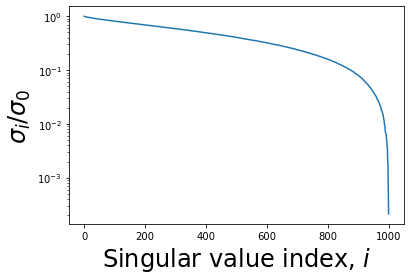

In [11]:
import numpy as np
import matplotlib.pyplot as plt
n = 1000
a = np.random.randn(n, n)
u, s, v = np.linalg.svd(a)
plt.semilogy(s/s[0])
plt.ylabel(r"$\sigma_i / \sigma_0$", fontsize=24)
plt.xlabel(r"Singular value index, $i$", fontsize=24)

## Приложения SVD

SVD имеет много разных названий, например метод главных компонент (PCA), Proper Orthogonal Decomposition, Empirical Orthogonal Functions, etc

Рассмотрим следующие прикладные задачи:

1. Разделение переменных в двумерной функции
2. Коллаборативная фильтрация
3. Сжатие полносвязных слоёв неройнной сети

## Разделение переменных для двумерной функции

Мы можем использовать SVD для вычисления аппроксимации матриц, полученных из вычисления некоторой функции в точках сетки

$$a_{ij} = f(x_i, y_j),$$

где $f$ заданная функция, а $x_i, \; i = 1, \ldots, n$ и $y_j, \; j = 1, \ldots, m$ некоторые одномерные сетки.

Text(0.5, 0, 'Singular value index, $i$')

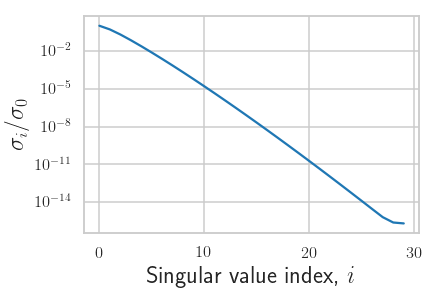

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rc("text", usetex=True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("talk")
# plt.xkcd()
n = 1000
a = [[1.0/(i+j+1) for i in range(n)] for j in range(n)] #Hilbert matrix 
a = np.array(a)
u, s, v = np.linalg.svd(a)
plt.semilogy(s[:30]/s[0])
plt.ylabel(r"$\sigma_i / \sigma_0$", fontsize=24)
plt.xlabel(r"Singular value index, $i$", fontsize=24)

## Коллаборативная фильтрация

- Важное приложение появилось из **рекомендательных систем**.  

- Пусть имеется матрица пользователей-продуктов: каждый пользователь ставит рейтинг некоторым продуктам.

- Тогда эта матрица имеет размер **число пользователей $\times$ число продуктов**. Задача – рекомендовать пользователям другие продукты, которые он мог бы купить.

- Схема построения рекомендаций: вычисляем SVD, и получаем рекомендации для каждого пользователя как столбец приближённой матрицы.

Подробнее на семинаре...

## Сжатие плотных матриц

Для хранения плотных матриц размера $N \times N$ обычно необходимо $N^2$ памяти. Аппроксимация ранга $r$ позволяет сократить требуемую память до $\mathcal{O}(Nr)$

3.141592653589798


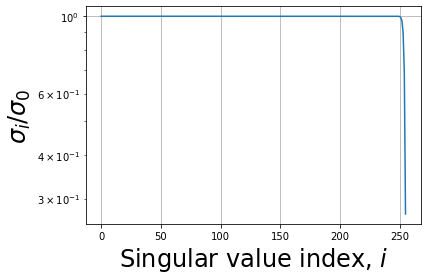

In [14]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# plt.xkcd()
n = 256
a = [[1.0/(i - j + 0.5) for i in range(n)] for j in range(n)]
a = np.array(a)
u, s, v = np.linalg.svd(a)
plt.semilogy(s/s[0])
plt.ylabel(r"$\sigma_i / \sigma_0$", fontsize=24)
plt.grid(True)
plt.xlabel(r"Singular value index, $i$", fontsize=24)
print(s[0])

## Сжатие полносвязных слоёв нейросетей



- Одним из основных элементов современных глубоких нейронных сетей является полносвязный слой, также известный как линейный слой.
- Этот слой реализует действие линейной функции на входной вектор: $ f (x) = Wx + b $, где $ W $ - обучаемая матрица, а $ b $ - обучаемый вектор.
- $ W $ и $ b $ обновляются во время обучения сети в соответствии с некоторым методом оптимизации, например SGD, Adam и т. д.
- Однако сохранение обученных оптимальных параметров ($ W $ и $ b $) может быть недопустимым, если вы хотите перенести обученную сеть на устройство, где память ограничена.
- В качестве возможного рецепта вы можете сжать матрицы $ W_i $ из $ i $ -го линейного слоя с помощью усечённого SVD !
Что вы получите после такого приближения $ W_i $:

    - эффективное хранение
    - более быстрое вычисление
    - умеренное снижение точности решения целевой задачи - классификации изображений

## Главное в этой лекции

- Ранг матрицы
- Скелетное разложение и представление матрицы ранга $r$
- SVD и теорема Eckart'a-Young'a
- Приложения SVD